In [1]:
#Q1. Write a Python code to implement the KNN classifier algorithm on load_iris dataset in sklearn.datasets.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Predict the classes for the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Optional: Visualizing the decision boundaries (for two features only)
def plot_decision_boundaries(X, y, classifier, title, feature_indices=(0, 1)):
    x_min, x_max = X[:, feature_indices[0]].min() - 1, X[:, feature_indices[0]].max() + 1
    y_min, y_max = X[:, feature_indices[1]].min() - 1, X[:, feature_indices[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, feature_indices[0]], X[:, feature_indices[1]], c=y, edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel(iris.feature_names[feature_indices[0]])
    plt.ylabel(iris.feature_names[feature_indices[1]])
    plt.show()

# Plot decision boundaries using the first two features
plot_decision_boundaries(X_test, y_test, knn, title="KNN Decision Boundaries", feature_indices=(0, 1))

# Plot decision boundaries using the last two features
plot_decision_boundaries(X_test, y_test, knn, title="KNN Decision Boundaries", feature_indices=(2, 3))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


ValueError: X has 2 features, but KNeighborsClassifier is expecting 4 features as input.

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Mean Squared Error: 30.95
R^2 Score: 0.58


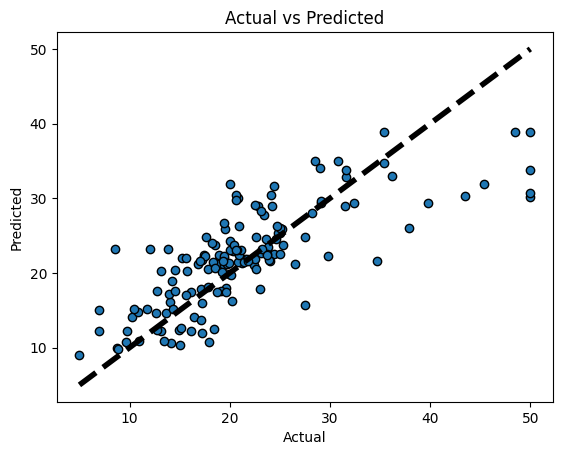

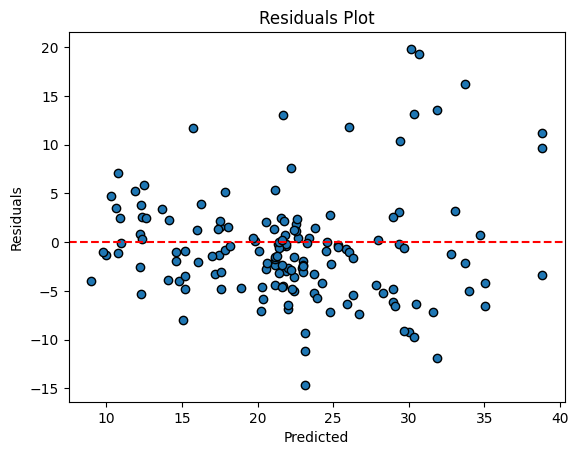

In [3]:
#Q2. Write a Python code to implement the KNN regressor algorithm on load_boston dataset in sklearn.datasets.

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the Boston dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
X = boston.data
y = boston.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN regressor with k=5
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the regressor
knn_regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = knn_regressor.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.2f}')

# Visualize the actual vs predicted values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


In [4]:
#Q3. Write a Python code snippet to find the optimal value of K for the KNN classifier algorithm using cross-validation on load_iris dataset in sklearn.datasets.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid: the range of k values to test
param_grid = {'n_neighbors': list(range(1, 31))}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters (optimal value of k)
best_k = grid_search.best_params_['n_neighbors']
print(f'The optimal value of k is: {best_k}')

# Train the KNN classifier with the optimal value of k
knn_optimal = KNeighborsClassifier(n_neighbors=best_k)
knn_optimal.fit(X_train, y_train)

# Predict the classes for the test set
y_pred = knn_optimal.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with optimal k: {accuracy:.2f}')

# Print the results of the grid search
print(f'Grid Search Best Score: {grid_search.best_score_:.2f}')
print(f'Grid Search Best Parameters: {grid_search.best_params_}')



The optimal value of k is: 1
Accuracy with optimal k: 1.00
Grid Search Best Score: 0.95
Grid Search Best Parameters: {'n_neighbors': 1}


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Mean Squared Error: 18.84
R^2 Score: 0.75


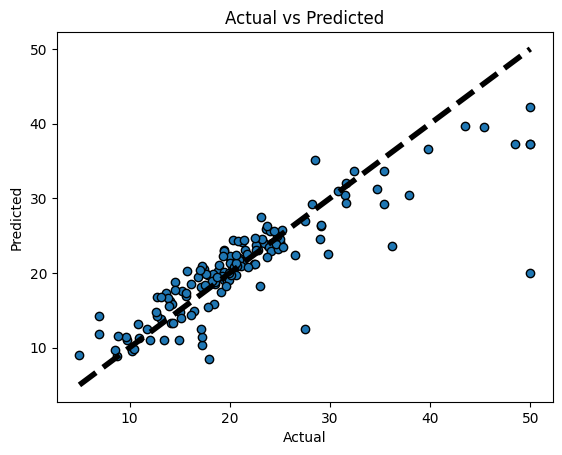

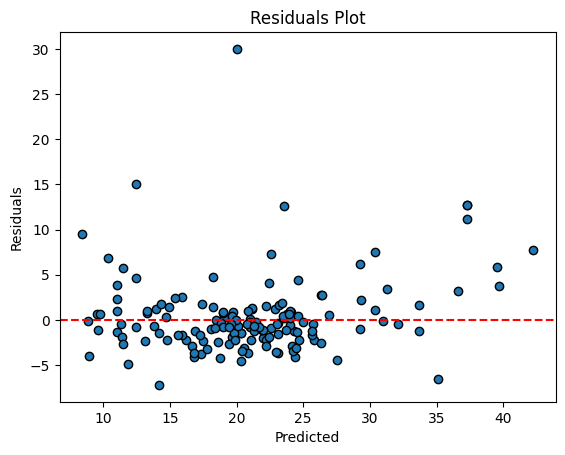

In [5]:
#Q4. Implement the KNN regressor algorithm with feature scaling on load_boston dataset in sklearn.datasets.

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the Boston dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
X = boston.data
y = boston.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN regressor with k=5
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the regressor on the scaled training data
knn_regressor.fit(X_train_scaled, y_train)

# Predict the target values for the scaled test set
y_pred = knn_regressor.predict(X_test_scaled)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.2f}')

# Visualize the actual vs predicted values
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()



In [7]:
#Q5. Write a Python code snippet to implement the KNN classifier algorithm with weighted voting on load_iris dataset in sklearn.datasets.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier with distance-based weights
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Train the classifier
knn.fit(X_train, y_train)

# Predict the classes for the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Optional: Visualizing the decision boundaries (for two features only)
def plot_decision_boundaries(X, y, classifier, title, feature_indices=(0, 1)):
    x_min, x_max = X[:, feature_indices[0]].min() - 1, X[:, feature_indices[0]].max() + 1
    y_min, y_max = X[:, feature_indices[1]].min() - 1, X[:, feature_indices[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, feature_indices[0]], X[:, feature_indices[1]], c=y, edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel(iris.feature_names[feature_indices[0]])
    plt.ylabel(iris.feature_names[feature_indices[1]])
    plt.show()

# Plot decision boundaries using the first two features
plot_decision_boundaries(X_test, y_test, knn, title="KNN Decision Boundaries with Weighted Voting", feature_indices=(0, 1))

# Plot decision boundaries using the last two features
plot_decision_boundaries(X_test, y_test, knn, title="KNN Decision Boundaries with Weighted Voting", feature_indices=(2, 3))



Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


ValueError: X has 2 features, but KNeighborsClassifier is expecting 4 features as input.

In [8]:
#Q6. Implement a function to standardise the features before applying KNN classifier.

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def knn_with_standardization(n_neighbors=5, test_size=0.3, random_state=42):
    # Load the Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit and transform the training data, and transform the test data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Train the classifier on the scaled training data
    knn.fit(X_train_scaled, y_train)

    # Predict the classes for the scaled test set
    y_pred = knn.predict(X_test_scaled)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Print the classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    # Print the confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

    return knn, scaler

# Example usage of the function
knn_model, scaler = knn_with_standardization(n_neighbors=5)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [10]:
#Q7. Write a Python function to calculate the euclidean distance between two points.


import numpy as np

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.

    Parameters:
    point1 (array-like): Coordinates of the first point.
    point2 (array-like): Coordinates of the second point.

    Returns:
    float: Euclidean distance between the two points.
    """
    # Convert points to numpy arrays for element-wise operations
    point1 = np.array(point1)
    point2 = np.array(point2)

    # Calculate the squared differences
    squared_diff = np.square(point1 - point2)

    # Sum the squared differences and take the square root
    distance = np.sqrt(np.sum(squared_diff))

    return distance

# Example usage:
pointA = [1, 2, 3]
pointB = [4, 6, 8]

print(f'Euclidean Distance: {euclidean_distance(pointA, pointB):.2f}')


Euclidean Distance: 7.07


In [11]:
#Q8. Write a Python function to calculate the manhattan distance between two points.

import numpy as np

def manhattan_distance(point1, point2):
    """
    Calculate the Manhattan distance between two points in n-dimensional space.

    Parameters:
    point1 (array-like): Coordinates of the first point.
    point2 (array-like): Coordinates of the second point.

    Returns:
    float: Manhattan distance between the two points.
    """
    # Convert points to numpy arrays for element-wise operations
    point1 = np.array(point1)
    point2 = np.array(point2)

    # Calculate the absolute differences
    abs_diff = np.abs(point1 - point2)

    # Sum the absolute differences
    distance = np.sum(abs_diff)

    return distance

# Example usage:
pointA = [1, 2, 3]
pointB = [4, 6, 8]

print(f'Manhattan Distance: {manhattan_distance(pointA, pointB):.2f}')


Manhattan Distance: 12.00
